# **European Drugs Development**

Team 10: Samuel Buelvas, Chamnan Suon, Gurveen Rekhi, Roberto Albornoz

## **Executive Summary**

Drug development in Europe plays a crucial role in shaping the pharmaceutical industry both in Europe and around the world. By understanding the behaviors of drug development stages and regulatory processes, we could uncover patterns and trends which would ultimately allow companies to better develop business strategies and adjust its internal process in order to optimize the successful implementation of the development.

Preliminary exploratory data analysis (EDA) was conducted on the European Medicines Agency (EMA) dataset to understand the portfolio structure and ensure the data support unsupervised learning. We began by examining authorization trends over time and expanding therapeutic area classifications to observe how the regulatory landscape has evolved. The time-series view highlights periods of acceleration and reveals whether surges in approvals are aligned with specific dominant disease areas or reflect broader diversification, directly informing our investigation into authorization trends.

Next, we assessed market concentration by identifying which marketing authorization holders account for the highest volume of medicines. This step determines whether approvals are broadly distributed across the industry or concentrated among a small group of firms. Understanding this distribution provides a baseline for segmenting companies in later stages, specifically to explore if certain portfolios or regulatory capabilities correlate with higher authorization accumulation.

Finally, we compared patterns between human and veterinary medicines and evaluated the variability of the unstructured indication text. We confirmed that the text descriptions contain sufficient length and diversity to support Natural Language Processing (NLP) tasks. This validates the project’s plan to use topic modeling to discover latent disease themes and niche clusters that are not fully captured by structured therapeutic labels alone.

## **Data Dictionary**

# `drugs_dataset.csv`

|Column  |Class      |Description          |
|:-------|:----------|:--------------------|
|category|character | human or veterinary|
|medicine_name | character | brand name of the medicine|
|therapeutic_area | character | semicolon-separated list of therapeutic areas|
|common_name | character | international non-proprietary name (INN) or common name|
|active_substance | character | common name of the active chemical in the drug|
|product_number | character | EMEA/H/C/ (human) or EMEA/V/C/ (veterinary) number for the drug|
|patient_safety | logical | has patient safety notices|
|authorisation_status | character | whether the drug was authorised, withdrawn, or refused (or does not have a reported status)|
|atc_code | character | anatomical therapeutic chemical code|
|additional_monitoring | logical | when true, the medicine is under additional monitoring, meaning that it is monitored even more intensively than other medicines|
|generic | logical | whether the drug is a generic medicine, which is developed to be the same as a medicine that has already been authorised, called the reference medicine. A generic medicine contains the same active substance(s) as the reference medicine, and is used at the same dose(s) to treat the same disease(s)|
|biosimilar | logical | whether the drug is a biosimilar medicine, which is a biological medicine highly similar to another already approved biological medicine called the reference medicine.|
|conditional_approval | logical | whether the medicine received a conditional marketing authorisation. This was granted in the interest of public health because the medicine addresses an unmet medical need and the benefit of immediate availability outweighs the risk from less comprehensive data than normally required.|
|exceptional_circumstances | logical | whether the medicine was authorised under exceptional circumstances, because the applicant was unable to provide comprehensive data on the efficacy and safety of the medicine under normal conditions of use. This can happen because the condition to be treated is rare or because collection of full information is not possible or is unethical.|
|accelerated_assessment | logical | whether the medicine had an accelerated assessment. This means that it is a medicine of major interest for public health, so its timeframe for review was 150 evaluation days rather than 210.|
|orphan_medicine | logical | whether the medicine was designated an orphan medicine. This means that it was developed for use against a rare, life-threatening or chronically debilitating condition or, for economic reasons, it would be unlikely to have been developed without incentives.|
|marketing_authorisation_date | date | date on which the drug was authorised|
|date_of_refusal_of_marketing_authorisation | date | date on which the drug was refused|
|marketing_authorisation_holder_company_name | character | name of the company that is authorised to market the drug|
|pharmacotherapeutic_group | character | the target of the drug|
|date_of_opinion | date | date on which the opinion was made|
|decision_date | date | date on which the latest decision was made|
|revision_number | integer | integer revision number|
|condition_indication | character | language describing the specific uses of the drug|
|species | character | for veterinary medicines, the target species; might benefit from further cleaning|
|first_published | datetime | datetime when the information was first published|
|revision_date | datetime | datetime of the most recent revision|
|url | character | url for details about the drug and submission|

## **Load Data**

In [ ]:
# Import pandas and numpy for DataFrame and operations
import pandas as pd
import numpy as np

In [ ]:
# Load dataset from github relative path
path = "https://raw.githubusercontent.com/SChamnan/ba820-unsupervised-ml-team10-project/refs/heads/main/european-drugs-development/drugs-dataset.csv"
drugs_df = pd.read_csv(path)

# Check out the first 5 rows of data
drugs_df.head(5)

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,NaN,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,...,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,Roche Registration GmbH,"Immune sera and immunoglobulins,",2021-11-11,2023-02-24,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12T16:30:00Z,2023-03-10T12:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,Novartis Europharm Limited,Immunosuppressants,2014-11-20,2023-01-26,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07T11:59:00Z,2023-03-09T18:53:00Z,https://www.ema.europa.eu/en/medicines/human/E...


## **Data Cleaning and Preprocessing**

In [ ]:
# Check number of rows and columns
drugs_df.shape

(1988, 28)

In [ ]:
drugs_df.describe()

,product_number,revision_number
count,1988.000000,1892.000000
mean,2634.774145,13.527484
std,1915.734686,11.647056
min,24.000000,0.000000
25%,715.750000,4.750000
50%,2544.500000,11.000000
75%,4351.000000,19.000000
max,6039.000000,89.000000


Below shows number of missing values in each column. These missing values could be either removed or keep as they are. Imputation may not be the best option as it may misrepresenting data.

In [ ]:
# Chart showing missing values of each column
missing_values = drugs_df.isnull().sum()
missing_percentage = ((drugs_df.isnull().sum() / len(drugs_df)) * 100).round(2)

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

display(missing_info.sort_values(by='Missing Count', ascending=False))

,Missing Count,Missing Percentage (%)
date_of_refusal_of_marketing_authorisation,1913,96.23
species,1709,85.97
date_of_opinion,779,39.19
therapeutic_area,285,14.34
revision_number,96,4.83
marketing_authorisation_date,60,3.02
decision_date,45,2.26
pharmacotherapeutic_group,34,1.71
revision_date,29,1.46
atc_code,28,1.41


In [ ]:
# Information of values of the variable 'species'
unique_species_with_nan = drugs_df['species'].value_counts(dropna=False)
print("\nUnique values and their counts (including NaN) in 'species' column:")
print(unique_species_with_nan)


Unique values and their counts (including NaN) in 'species' column:
species
NaN                                                                    1709
Dogs                                                                     70
Cats                                                                     28
Pigs                                                                     25
Dogs; Cats                                                               18
Horses                                                                   18
Chicken                                                                  15
Cattle                                                                   10
Cattle; Pigs; Sheep                                                       7
Sheep; Cattle                                                             6
Cats; Dogs                                                                5
Sheep                                                                     5
Rabbits    

In [ ]:
# Get the count of all unique values, including NaN, for 'authorisation_status'
unique_auth_status_with_nan = drugs_df['authorisation_status'].value_counts(dropna=False)
print("Unique values and their counts (including NaN) in 'authorisation_status' column:")
print(unique_auth_status_with_nan)

# You can apply the same to other columns as needed, for example 'category'
unique_category_with_nan = drugs_df['category'].value_counts(dropna=False)
print("\nUnique values and their counts (including NaN) in 'category' column:")
print(unique_category_with_nan)

Unique values and their counts (including NaN) in 'authorisation_status' column:
authorisation_status
authorised    1573
withdrawn      357
refused         57
NaN              1
Name: count, dtype: int64

Unique values and their counts (including NaN) in 'category' column:
category
human         1706
veterinary     282
Name: count, dtype: int64


### **Categorization of the Columns**

In [ ]:
# Categorize columns type
# Category cols
cat_cols = ["category",
            "medicine_name",
            "common_name",
            "active_substance",
            "authorisation_status",
            "atc_code",
            "marketing_authorisation_holder_company_name"]

#text cols
text_cols = ["condition_indication"]

# id cols
id_cols = ["url", "product_number"]

# list text cols
list_text_cols = ["therapeutic_area",
                  "pharmacotherapeutic_group",
                  "species"]

# Numeric cols
numeric_cols = ["revision_number"]

# Boolean cols
boolean_cols = ["patient_safety",
                "additional_monitoring",
                "generic",
                "biosimilar",
                "conditional_approval",
                "exceptional_circumstances",
                "accelerated_assessment",
                "orphan_medicine",
                ]

# Datetime cols
datetime_cols = ["marketing_authorisation_date",
             "date_of_refusal_of_marketing_authorisation",
             "date_of_opinion",
             "decision_date",
             "revision_date",
             "first_published"]


### **Preparing data for Analysis**

In [ ]:

def clean_string_series(s):
    """
    Standard string cleanup:
    - converts to pandas 'string' dtype
    - normalizes whitespace (multiple spaces -> one)
    - trims leading/trailing whitespace
    """
    s = s.astype("string")
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()
    return s

def to_bool_series(s):
    """
    Robust boolean conversion:
    Handles columns that might be stored as:
    - True/False
    - 1/0
    - 'TRUE'/'FALSE'
    - 'Yes'/'No'
    Missing values are treated as False (safe default for these regulatory flags).
    """
    if s.dtype == bool:
        return s.fillna(False)

    s_str = s.astype("string")
    s_norm = s_str.str.strip().str.lower()

    true_set = {"true", "t", "1", "yes", "y"}
    false_set = {"false", "f", "0", "no", "n", ""}

    out = pd.Series(pd.NA, index=s.index, dtype="boolean")
    out = out.mask(s_norm.isin(true_set), True)
    out = out.mask(s_norm.isin(false_set), False)

    # fallback numeric coercion for any remaining NAs
    if out.isna().any():
        num = pd.to_numeric(s_str, errors="coerce")
        out = out.fillna(num.eq(1))

    return out.fillna(False).astype(bool)

def clean_list_text_column(s):
    """
    Cleanup for semicolon-separated list fields like:
    therapeutic_area, pharmacotherapeutic_group, species.
    - normalizes whitespace
    - standardizes delimiter spacing: "A;B" -> "A; B"
    """
    s = clean_string_series(s)
    s = s.str.replace(r"\s*;\s*", "; ", regex=True)
    return s

def clean_species_column(s):
    """
    Extra cleanup for species:
    - removes parenthetical qualifiers: 'Pigs (for fattening)' -> 'Pigs'
    - standardizes semicolon spacing: 'Dogs;Cats' -> 'Dogs; Cats'
    """
    s = clean_list_text_column(s)
    s = s.str.replace(r"\s*\(.*?\)\s*", "", regex=True).str.strip()
    s = s.str.replace(r"\s*;\s*", "; ", regex=True)
    return s

**clean_string_series(s)**
This function cleans a text column in a consistent way. It converts the column to a string type, replaces multiple spaces with a single space, and removes extra spaces at the beginning and end of each value. This helps avoid errors caused by inconsistent spacing.

**to_bool_series(s)**
This function converts a column into True/False values even if the column is stored in different formats. It can handle values like True/False, 1/0, and text like "yes"/"no" or "true"/"false". Missing values are treated as False to keep regulatory flag columns safe and consistent for later analysis.

**clean_list_text_column(s)**
This function cleans columns that contain lists stored as text using semicolons (for example: "A;B"). It first applies basic text cleaning (spacing and trimming). Then it standardizes the semicolon format so items are separated as "; " (semicolon + one space). This makes splitting the list later more reliable.

**clean_species_column(s)**
This function is a specialized cleaner for the species column. It applies the semicolon list cleaning, removes extra text written inside parentheses (for example: "Pigs (for fattening)" becomes "Pigs"), and standardizes semicolon spacing again. This produces a cleaner and more consistent species field for later grouping and analysis.

### **Cleaning & Type casting columns**

In [ ]:
drugs_df = drugs_df.copy()

# Clean category/text/id columns (trim + normalize spacing)
for c in (cat_cols + text_cols + id_cols):
    if c in drugs_df.columns:
        drugs_df[c] = clean_string_series(drugs_df[c])

# Clean list-text columns
for c in list_text_cols:
    if c in drugs_df.columns:
        if c == "species":
            drugs_df[c] = clean_species_column(drugs_df[c])
        else:
            drugs_df[c] = clean_list_text_column(drugs_df[c])

# Standardize small categorical fields
if "category" in drugs_df.columns:
    drugs_df["category"] = drugs_df["category"].astype("string").str.lower().str.strip()

if "authorisation_status" in drugs_df.columns:
    drugs_df["authorisation_status"] = drugs_df["authorisation_status"].astype("string").str.lower().str.strip()

if "atc_code" in drugs_df.columns:
    drugs_df["atc_code"] = drugs_df["atc_code"].astype("string").str.upper().str.strip()

# Cast booleans group
for c in boolean_cols:
    if c in drugs_df.columns:
        drugs_df[c] = to_bool_series(drugs_df[c])


# Cast numeric group
for c in numeric_cols:
    if c in drugs_df.columns:
        drugs_df[c] = pd.to_numeric(drugs_df[c], errors="coerce").astype("Int64")


# Cast datetimes group
for c in datetime_cols:
    if c in drugs_df.columns:
        drugs_df[c] = pd.to_datetime(drugs_df[c], errors="coerce")


# Quick checks
print("Category counts:\n", drugs_df["category"].value_counts(dropna=False), "\n")
print("Status counts:\n", drugs_df["authorisation_status"].value_counts(dropna=False), "\n")
if "species" in drugs_df.columns:
    print("Top species values:\n", drugs_df["species"].value_counts(dropna=False).head(10))


Category counts:
 category
human         1706
veterinary     282
Name: count, dtype: Int64 

Status counts:
 authorisation_status
authorised    1573
withdrawn      357
refused         57
<NA>             1
Name: count, dtype: Int64 

Top species values:
 species
<NA>                   1709
Dogs                     71
Pigs                     36
Cats                     28
Dogs; Cats               18
Horses                   18
Chicken                  15
Cattle                   12
Cattle; Pigs; Sheep       7
Sheep; Cattle             6
Name: count, dtype: Int64


**Clean category/text/id columns**
Since text fields can include extra spaces or inconsistent spacing, we clean these columns by standardizing whitespace and trimming leading and trailing spaces.

**Clean list-text columns**
Since some fields store multiple values in one cell using semicolons, we standardize the formatting of these list-style columns so they are consistent. For species, we also remove text inside parentheses to keep the names clean.

**Standardize small categorical fields**
Since category and authorisation_status may appear with different capitalization or spaces, we convert them to lowercase and trim spaces. Since atc_code should follow a consistent code format, we convert it to uppercase and trim spaces.

**Cast columns (booleans, numeric, and datetime)**
Since some columns may be stored with inconsistent data types (for example, booleans as text, numbers as strings, or dates in mixed formats), we convert boolean, numeric, and datetime columns into consistent types. Any values that cannot be converted are set to missing to avoid errors in later analysis.

**Quick checks**
Since we want to confirm the cleaning worked, we print basic value counts for category, authorisation_status, and the most common species values.

### **Create Derived columns for Analysis**

In [ ]:
# Shared / Computed derived columns
drugs_df["category_clean"] = drugs_df["category"].astype("string").str.strip().str.lower().fillna("unknown")
drugs_df["authorisation_status_clean"] = drugs_df["authorisation_status"].astype("string").str.strip().str.lower().fillna("unknown")

drugs_df["is_veterinary"] = (drugs_df["category_clean"] == "veterinary").astype(int)
drugs_df["is_authorised"] = (drugs_df["authorisation_status_clean"] == "authorised").astype(int)
drugs_df["is_withdrawn"]  = (drugs_df["authorisation_status_clean"] == "withdrawn").astype(int)
drugs_df["is_refused"]    = (drugs_df["authorisation_status_clean"] == "refused").astype(int)


# Map diseases being targeted (Indication NLP readiness)
drugs_df["condition_indication_clean"] = (
    drugs_df["condition_indication"]
      .fillna("")
      .astype("string")
      .str.replace(r"\s+", " ", regex=True)
      .str.strip()
      .str.lower()
)
drugs_df["indication_length"] = drugs_df["condition_indication_clean"].str.len().astype(int)

# Helpful for interpretation later
drugs_df["therapeutic_area_list"] = drugs_df["therapeutic_area"].apply(
    lambda x: [] if pd.isna(x) or str(x).strip() == ""
    else sorted(set([p.strip().lower() for p in str(x).split(";") if p.strip()]))
)
drugs_df["therapeutic_area_count"] = drugs_df["therapeutic_area_list"].apply(len).astype(int)
drugs_df["missing_therapeutic_area"] = drugs_df["therapeutic_area"].isna().astype(int)

drugs_df["atc_code_clean"] = drugs_df["atc_code"].astype("string").str.strip().str.upper()
drugs_df["atc_level1"] = drugs_df["atc_code_clean"].str[0]
drugs_df["atc_level2"] = drugs_df["atc_code_clean"].str[:3].where(drugs_df["atc_code_clean"].str.len() >= 3, pd.NA)
drugs_df["missing_atc_code"] = drugs_df["atc_code"].isna().astype(int)

# What types of medicines get special approvals?
pathway_cols = [
    "orphan_medicine",
    "accelerated_assessment",
    "conditional_approval",
    "exceptional_circumstances",
    "additional_monitoring",
]

drugs_df["special_pathway_count"] = drugs_df[pathway_cols].sum(axis=1).astype(int)

def make_pathway_profile(row):
    active = [c for c in pathway_cols if bool(row[c])]
    return "+".join(active) if active else "none"

drugs_df["pathway_profile"] = drugs_df.apply(make_pathway_profile, axis=1)

# Human vs veterinary + veterinary species segmentation
drugs_df["species_clean"] = np.where(
    drugs_df["category_clean"] == "human",
    "human",
    drugs_df["species"].astype("string").str.strip()
)

drugs_df["missing_species_vet"] = (
    (drugs_df["category_clean"] == "veterinary") & (drugs_df["species_clean"].isna())
).astype(int)

drugs_df["species_clean"] = np.where(
    (drugs_df["category_clean"] == "veterinary") & (drugs_df["species_clean"].isna()),
    "unknown",
    drugs_df["species_clean"]
)

drugs_df["species_list"] = drugs_df["species_clean"].apply(
    lambda v: [] if pd.isna(v) or v in ["human", "unknown", ""]
    else sorted(set([p.strip().lower() for p in str(v).split(";") if p.strip()]))
)
drugs_df["species_count"] = drugs_df["species_list"].apply(len).astype(int)
drugs_df["multi_species_flag"] = (drugs_df["species_count"] > 1).astype(int)

# Quick checks
print("Derived status flag sum counts:\n",
      (drugs_df[["is_authorised", "is_withdrawn", "is_refused"]].sum(axis=1)).value_counts(dropna=False))

print("\nMissing species in veterinary rows:", drugs_df["missing_species_vet"].sum())
print("\nTop species_clean values:\n", drugs_df["species_clean"].value_counts(dropna=False).head(10))


Derived status flag sum counts:
 1    1987
0       1
Name: count, dtype: int64

Missing species in veterinary rows: 3

Top species_clean values:
 species_clean
human                  1706
Dogs                     71
Pigs                     36
Cats                     28
Dogs; Cats               18
Horses                   18
Chicken                  15
Cattle                   12
Cattle; Pigs; Sheep       7
Sheep; Cattle             6
Name: count, dtype: int64


**Clean and standardize key categorical fields**
Since categories may have extra spaces or different capitalization, we create category_clean by trimming, converting to lowercase, and replacing missing values with "unknown" so values like “Human” and “human” are treated the same.

Since authorisation_status is used to compare outcomes across medicines, we create authorisation_status_clean by trimming, converting to lowercase, and replacing missing values with "unknown" to support reliable grouping and analysis.

**Create simple indicator (0/1) variables**
Since unsupervised methods work better with numeric inputs than text labels, we create is_veterinary as a 0/1 indicator based on category_clean.

Since we often need quick counts by status, we create is_authorised, is_withdrawn, and is_refused as 0/1 indicators from authorisation_status_clean, where "unknown" results in all three indicators being 0.

**Prepare indication text for NLP and quality checks**
Since condition_indication is free text with inconsistent spacing and casing, we create condition_indication_clean by filling missing values with an empty string, normalizing spaces, trimming, and converting to lowercase so it is ready for NLP steps.

Since indications can be very short or very long, we compute indication_length as the character length of condition_indication_clean to support basic checks and descriptive analysis.

**Therapeutic area processing**
Since therapeutic_area is stored as a semicolon-separated list, we create therapeutic_area_list by splitting on semicolons, trimming and lowercasing items, and removing duplicates to get a clean set of areas per medicine.

Since medicines can be linked to one or many therapeutic areas, we compute therapeutic_area_count to measure how many areas each medicine has.

Since missing therapeutic_area values may affect interpretation, we create missing_therapeutic_area as a 0/1 indicator to track where this field is absent.

**ATC code standardization and hierarchy**
Since ATC codes can have inconsistent formatting, we create atc_code_clean by trimming and converting to uppercase so codes match consistently.

Since ATC codes are hierarchical, we create atc_level1 (first character) and atc_level2 (first three characters) to support analysis at different levels.

Since some medicines may not have an ATC code recorded, we create missing_atc_code as a 0/1 indicator to track missingness.

**Special regulatory pathway features**
Since a medicine can have multiple pathway flags at the same time, we compute special_pathway_count by summing these flags to measure how many special pathways apply.

Since it is useful to interpret the exact combination of pathways, we create pathway_profile as a label listing all active pathway flags for each medicine.

**Species cleaning and veterinary segmentation**
Since species is not applicable for human medicines, we set species_clean to "human" when category_clean is "human" so it is not treated as missing.

Since some veterinary medicines have missing species values, we create missing_species_vet to flag veterinary rows where species is missing.

Since veterinary rows should have an explicit value even when species is missing, we replace missing veterinary species values with "unknown" in species_clean.

Since species may include multiple values separated by semicolons, we create species_list by splitting, trimming, lowercasing, and removing duplicates to form a clean list per medicine.

Since multi-species products may behave differently than single-species products, we compute species_count and multi_species_flag to measure and flag medicines that target more than one species.

**Quick checks**
Since we need to confirm the derived status flags behave as expected, we print the distribution of the sum of is_authorised, is_withdrawn, and is_refused to verify most rows have exactly one active status and "unknown" rows have zero.

Since we want to confirm veterinary species missingness is small and isolated, we print the total count of missing_species_vet.

Since we want a quick view of species after cleaning, we print the most common values in species_clean.

### **Data Overview After Cleaning**

In [ ]:
# show size, missingness, imbalance, and what fields are “strong enough” to analyze.
# Shape
print("Rows, Columns:", drugs_df.shape)

# Missingness table (top missing)
missing = drugs_df.isna().mean().sort_values(ascending=False).to_frame("missing_pct")
missing["missing_pct"] = (missing["missing_pct"] * 100).round(2)
print(missing.head(15))

# Uniqueness checks
print("Unique product_number:", drugs_df["product_number"].nunique(dropna=False))
print("Unique url:", drugs_df["url"].nunique(dropna=False))

Rows, Columns: (1988, 50)
                                            missing_pct
date_of_refusal_of_marketing_authorisation        96.23
species                                           85.97
date_of_opinion                                   39.19
therapeutic_area                                  14.34
revision_number                                    4.83
marketing_authorisation_date                       3.02
decision_date                                      2.26
pharmacotherapeutic_group                          1.71
revision_date                                      1.46
atc_code                                           1.41
atc_level1                                         1.41
atc_level2                                         1.41
atc_code_clean                                     1.41
condition_indication                               0.60
common_name                                        0.20
Unique product_number: 1932
Unique url: 1988


In [ ]:
drugs_df.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,atc_level1,atc_level2,missing_atc_code,special_pathway_count,pathway_profile,species_clean,missing_species_vet,species_list,species_count,multi_species_flag
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,L,L01,0,1,orphan_medicine,human,0,[],0,0
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,A,A16,0,0,none,human,0,[],0,0
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,<NA>,True,...,<NA>,<NA>,1,3,orphan_medicine+exceptional_circumstances+addi...,human,0,[],0,0
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,J,J06,0,1,additional_monitoring,human,0,[],0,0
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis, ...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,L,L04,0,0,none,human,0,[],0,0


Dataset is cleaned and is ready for next steps.

## **Exploratory Data Analysis**

In [ ]:
# Import libraries for plotting
import matplotlib.pyplot as plt

### **Authorized drugs trend over time**

Viewing trend of drugs being authorized to be marketed over time.

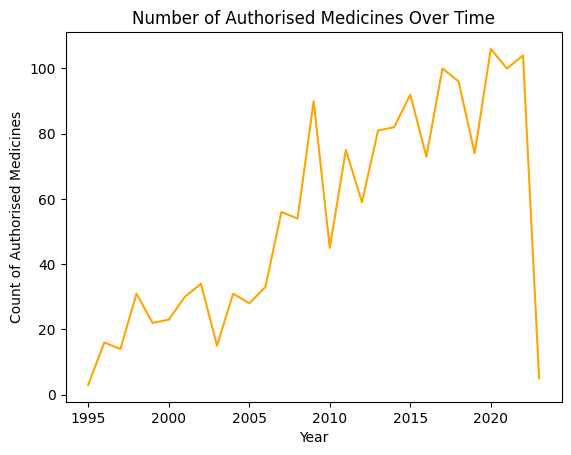

In [ ]:
##### Check out drugs authorized drugs trend overtime #####
# Authorised medicines only
authorised_df = drugs_df[drugs_df["authorisation_status_clean"] == "authorised"].copy()

# Year of authorisation
authorised_df["authorised_year"] = authorised_df["marketing_authorisation_date"].dt.year

# Count per year (drop NaN years)
authorised_per_year = authorised_df["authorised_year"].dropna().value_counts().sort_index()

plt.figure()
authorised_per_year.plot(kind="line", color='orange')
plt.title("Number of Authorised Medicines Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Authorised Medicines")
plt.show()

### **Top companies with most authorised medicines**

Viewing list of top 10 companies with the most authorized medicines.

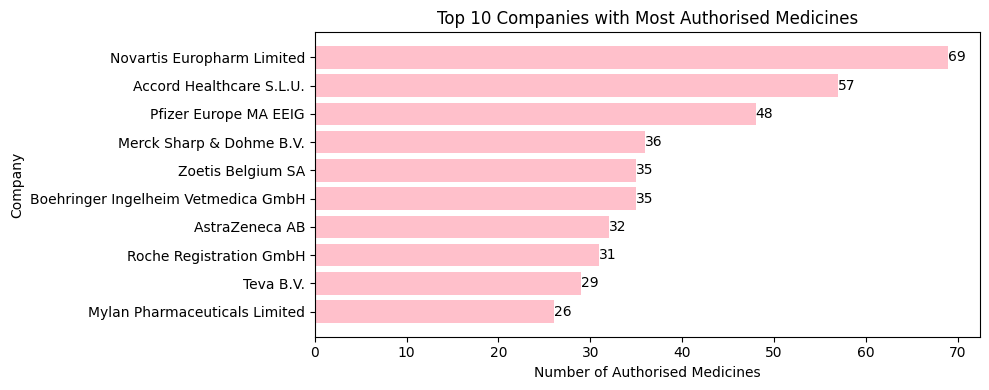

In [ ]:
##### Check out companies with the most authorized medicines #####
authorised_df = drugs_df[drugs_df["authorisation_status_clean"] == "authorised"].copy()

company_counts = (
authorised_df["marketing_authorisation_holder_company_name"]
.value_counts()
.head(10)
.sort_values() # sort for barh readability
)

plt.figure(figsize=(10, 4))
plt.barh(company_counts.index, company_counts.values, color='pink')

# Add number on each bar for better readability
for i, v in enumerate(company_counts):
  plt.text(v, i, str(v), va='center')

plt.xlabel("Number of Authorised Medicines")
plt.ylabel("Company")
plt.title("Top 10 Companies with Most Authorised Medicines")
plt.tight_layout()
plt.show()

### **Top therapeutic areas by authorised medicines**

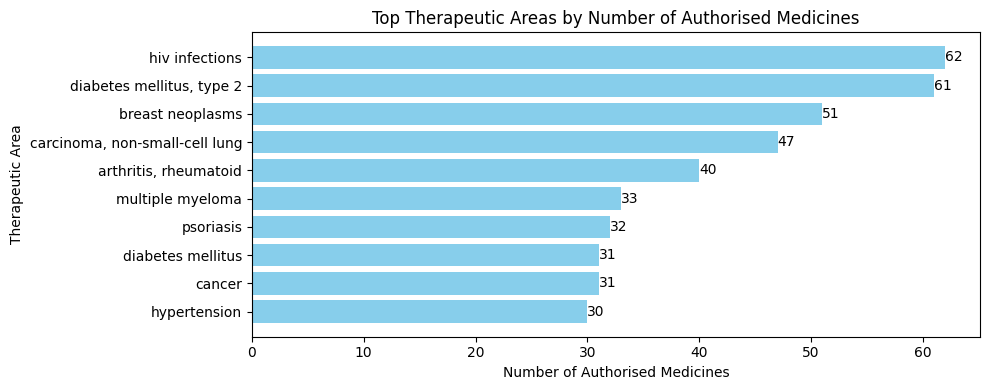

In [ ]:
# Filter to get only authorized medicines
authorised_df = drugs_df[drugs_df["authorisation_status_clean"] == "authorised"].copy()

therapeutic_counts = (
authorised_df.explode("therapeutic_area_list")["therapeutic_area_list"]
.dropna()
.value_counts()
.head(10)
.sort_values()
)

# Plot bar graph
plt.figure(figsize=(10, 4))
plt.barh(therapeutic_counts.index, therapeutic_counts.values, color='skyblue')

# Add number on each bar for better readability
for i, v in enumerate(therapeutic_counts.values):
    plt.text(v, i, str(v), va='center')

plt.xlabel("Number of Authorised Medicines")
plt.ylabel("Therapeutic Area")
plt.title("Top Therapeutic Areas by Number of Authorised Medicines")
plt.tight_layout()
plt.show()

### **Patterns of Special Approvals and Overlap**

builds on (1–3) by asking whether approvals are “standard” or concentrated in special regulatory pathways, and whether those pathways form natural profiles for segmentation.


Special-pathway flag prevalence (share of medicines):
additional_monitoring        19.47%
orphan_medicine               8.15%
accelerated_assessment        2.41%
conditional_approval          2.41%
exceptional_circumstances     2.41%
dtype: object

Distribution of special_pathway_count:
special_pathway_count
0    1500
1     338
2      96
3      53
4       1
Name: count, dtype: int64

Most common pathway profiles:
pathway_profile
none                                                                 1500
additional_monitoring                                                 251
orphan_medicine                                                        50
orphan_medicine+additional_monitoring                                  50
orphan_medicine+conditional_approval+additional_monitoring             26
accelerated_assessment                                                 24
orphan_medicine+exceptional_circumstances+additional_monitoring        18
conditional_approval+additional_monitoring       

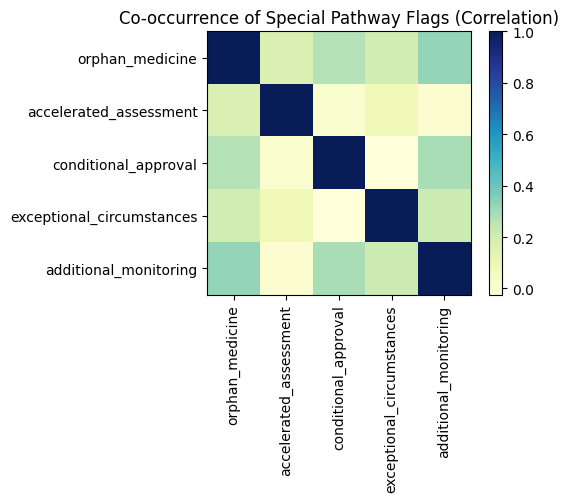

In [ ]:

pathway_cols = [
    "orphan_medicine",
    "accelerated_assessment",
    "conditional_approval",
    "exceptional_circumstances",
    "additional_monitoring",
]

# How common is each special pathway flag?
flag_rates = drugs_df[pathway_cols].mean().sort_values(ascending=False)
print("Special-pathway flag prevalence (share of medicines):")
print((flag_rates * 100).round(2).astype(str) + "%")

# How many special flags per medicine?
print("\nDistribution of special_pathway_count:")
print(drugs_df["special_pathway_count"].value_counts().sort_index())

# Most common pathway combinations
print("\nMost common pathway profiles:")
print(drugs_df["pathway_profile"].value_counts().head(15))

# Co-occurrence (do flags tend to appear together?)
corr = drugs_df[pathway_cols].astype(int).corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr, interpolation="nearest", cmap="YlGnBu")
plt.xticks(range(len(pathway_cols)), pathway_cols, rotation=90)
plt.yticks(range(len(pathway_cols)), pathway_cols)
plt.title("Co-occurrence of Special Pathway Flags (Correlation)")
plt.colorbar()
plt.tight_layout()
plt.show()

### **Special approvals look different across categories and species**

It compares the regulatory “signal” across human vs veterinary, then zooming into veterinary species segmentation.


Special-pathway flag rates by category (mean of boolean flags):
                orphan_medicine  accelerated_assessment  conditional_approval  \
category_clean                                                                  
human                     0.095                   0.023                 0.028   
veterinary                0.000                   0.028                 0.000   

                exceptional_circumstances  additional_monitoring  
category_clean                                                    
human                               0.026                  0.227  
veterinary                          0.011                  0.000  


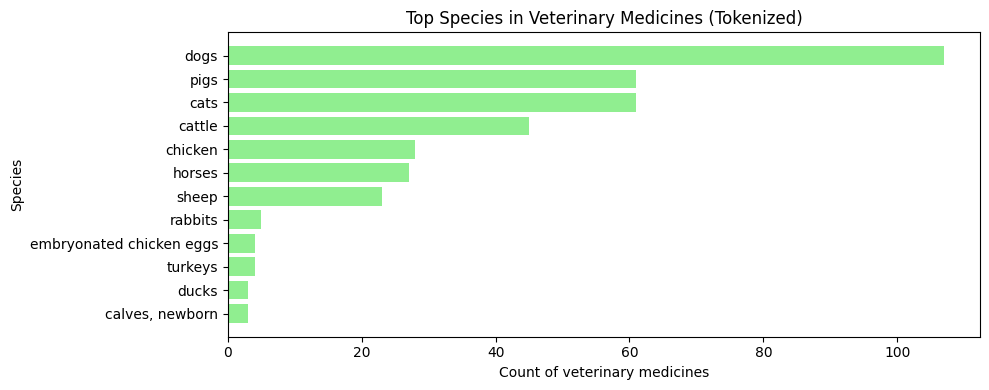


Share of veterinary medicines that target multiple species:
0.277


In [ ]:

import matplotlib.pyplot as plt

pathway_cols = [
    "orphan_medicine",
    "accelerated_assessment",
    "conditional_approval",
    "exceptional_circumstances",
    "additional_monitoring",
]

# Compare special-pathway rates across human vs veterinary
print("Special-pathway flag rates by category (mean of boolean flags):")
print(drugs_df.groupby("category_clean")[pathway_cols].mean().round(3))

# Veterinary-only: species distribution (tokenized list)
vet_df = drugs_df[drugs_df["category_clean"] == "veterinary"].copy()

species_counts = (
    vet_df.explode("species_list")["species_list"]
    .dropna()
    .value_counts()
    .head(12)
    .sort_values()
)

plt.figure(figsize=(10, 4))
plt.barh(species_counts.index, species_counts.values, color="lightgreen")
plt.xlabel("Count of veterinary medicines")
plt.ylabel("Species")
plt.title("Top Species in Veterinary Medicines (Tokenized)")
plt.tight_layout()
plt.show()

# Multi-species structure (useful segmentation signal)
print("\nShare of veterinary medicines that target multiple species:")
print(vet_df["multi_species_flag"].mean().round(3))

### **Variability for NLP clustering**

Unstructured text that will power unsupervised discovery of disease/indication clusters.

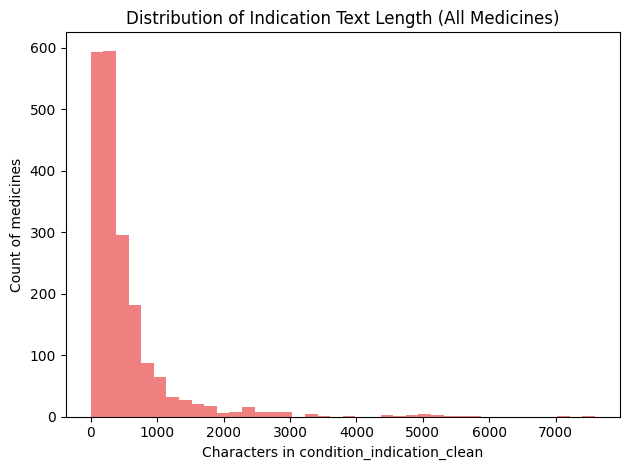


Indication length summary by category_clean:
                 count        mean    50%     max
category_clean                                   
human           1706.0  519.284877  299.5  7592.0
veterinary       282.0  431.574468  291.0  2513.0

Indication length summary by authorisation_status_clean:
                             count        mean    50%     max
authorisation_status_clean                                   
authorised                  1573.0  526.957406  311.0  7592.0
refused                       57.0  112.824561   40.0   971.0
unknown                        1.0    0.000000    0.0     0.0
withdrawn                    357.0  482.546218  301.0  4513.0

Top 25 words in authorised indication text:
[('with', 3636), ('and', 3403), ('the', 3314), ('for', 2839), ('treatment', 2527), ('patients', 2154), ('indicated', 2011), ('adult', 1088), ('who', 1018), ('combination', 956), ('have', 733), ('are', 603), ('therapy', 593), ('not', 572), ('adults', 541), ('years', 481), ('disea

In [ ]:
from collections import Counter

# Distribution of text length
plt.figure()
plt.hist(drugs_df["indication_length"].dropna(), bins=40, color="lightcoral")
plt.title("Distribution of Indication Text Length (All Medicines)")
plt.xlabel("Characters in condition_indication_clean")
plt.ylabel("Count of medicines")
plt.tight_layout()
plt.show()

# Text length summaries by category and status
print("\nIndication length summary by category_clean:")
print(drugs_df.groupby("category_clean")["indication_length"].describe()[["count", "mean", "50%", "max"]])

print("\nIndication length summary by authorisation_status_clean:")
print(drugs_df.groupby("authorisation_status_clean")["indication_length"].describe()[["count", "mean", "50%", "max"]])

# Lightweight top-words check (gives intuition about recurring themes)
def top_words(series, n=25, min_len=3):
    words = []
    for txt in series:
        tokens = str(txt).split()
        tokens = [t for t in tokens if len(t) >= min_len]
        words.extend(tokens)
    return Counter(words).most_common(n)

authorised_df = drugs_df[drugs_df["authorisation_status_clean"] == "authorised"].copy()
withdrawn_df = drugs_df[drugs_df["authorisation_status_clean"] == "withdrawn"].copy()

print("\nTop 25 words in authorised indication text:")
print(top_words(authorised_df["condition_indication_clean"], n=25))

print("\nTop 25 words in withdrawn indication text:")
print(top_words(withdrawn_df["condition_indication_clean"], n=25))